<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/Human_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [40]:
file=open('WISDM_ar_v1.1_raw.txt')

In [41]:
lines=file.readlines()
lines[:10]

['33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;\n',
 '33,Jogging,49106062271000,5.012288,11.264028,0.95342433;\n',
 '33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;\n',
 '33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172;\n',
 '33,Jogging,49106332290000,-1.1849703,12.108489,7.205164;\n',
 '33,Jogging,49106442306000,1.3756552,-2.4925237,-6.510526;\n',
 '33,Jogging,49106542312000,-0.61291564,10.56939,5.706926;\n',
 '33,Jogging,49106652389000,-0.50395286,13.947236,7.0553403;\n',
 '33,Jogging,49106762313000,-8.430995,11.413852,5.134871;\n',
 '33,Jogging,49106872299000,0.95342433,1.3756552,1.6480621;\n']

In [42]:
processedList=[]

In [43]:
for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [44]:
processedList[:10]

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621']]

In [45]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data=pd.DataFrame(processedList,columns=columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [46]:
data.shape

(343416, 6)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [48]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [49]:
data.activity.value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [50]:
data.x=data.x.astype('float')
data.y=data.y.astype('float')
data.z=data.z.astype('float')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [52]:
activities=data.activity.value_counts().index

In [53]:
type(activities),activities

(pandas.core.indexes.base.Index,
 Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object'))

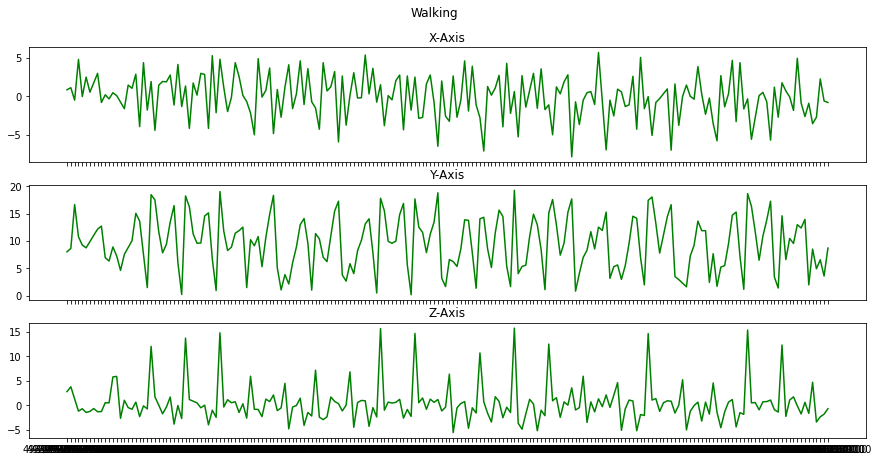

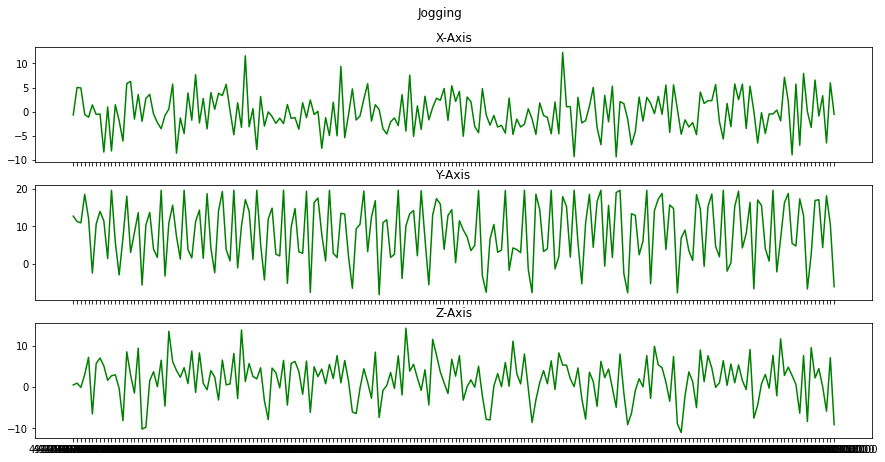

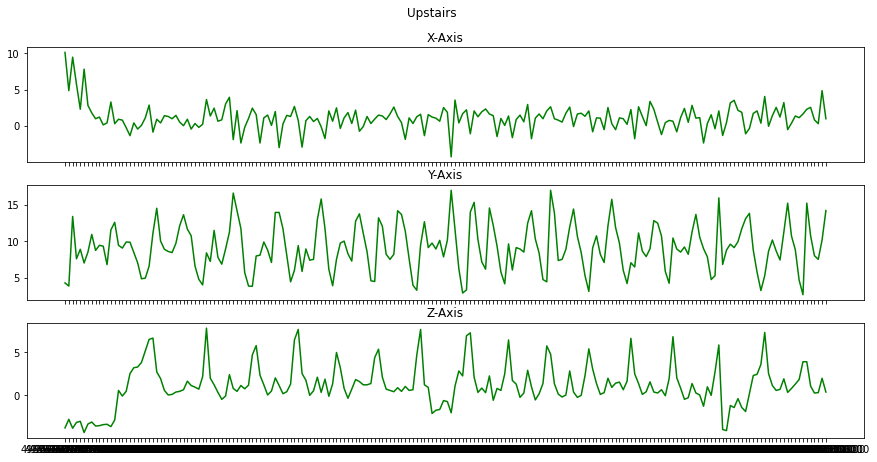

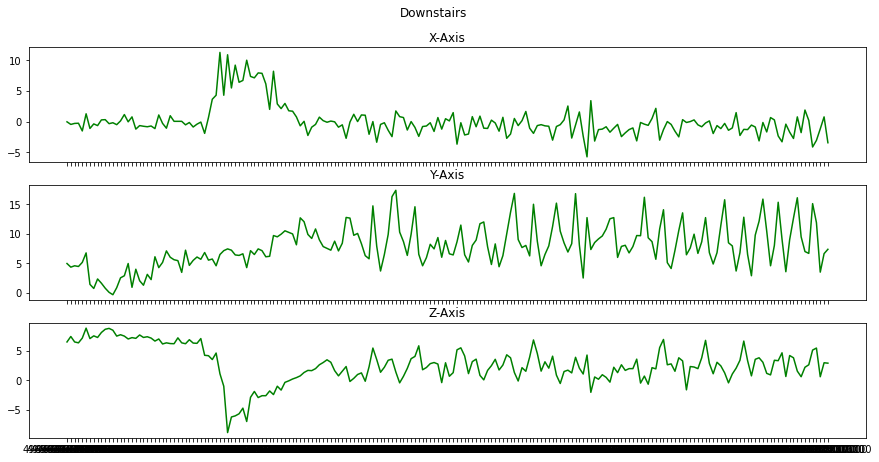

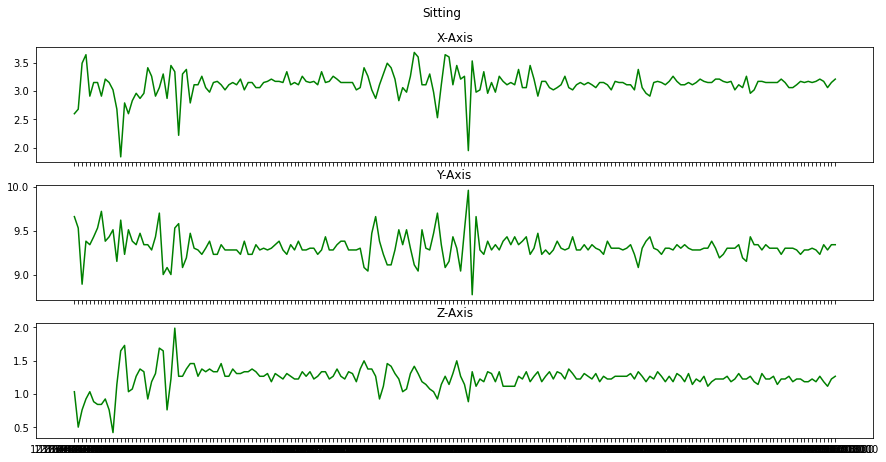

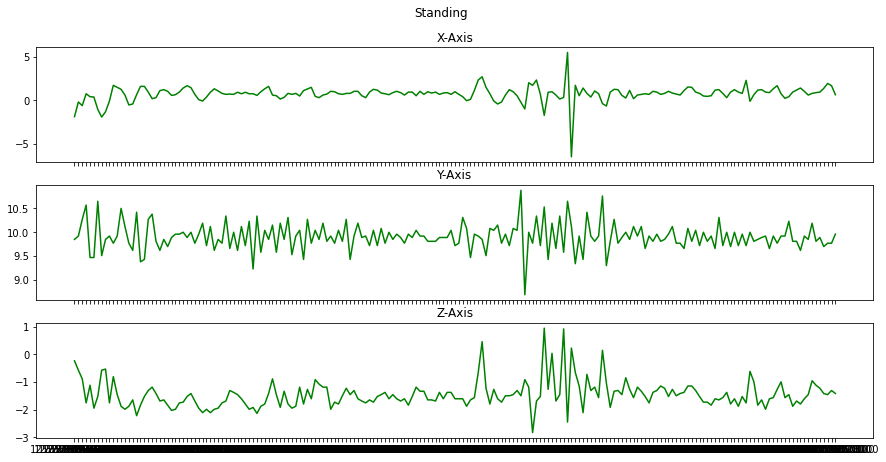

In [54]:
Fs=20

def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    # ax.xaxis.set_visible(False)
    # ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    # ax.set_xlim([min(x), max(x)])
    # ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [55]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [56]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

In [57]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape


(21330, 4)

In [58]:
balanced_data.activity.value_counts()

Standing      3555
Downstairs    3555
Sitting       3555
Walking       3555
Jogging       3555
Upstairs      3555
Name: activity, dtype: int64

In [59]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21330 entries, 597 to 257322
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  21330 non-null  object 
 1   x         21330 non-null  float64
 2   y         21330 non-null  float64
 3   z         21330 non-null  float64
dtypes: float64(3), object(1)
memory usage: 833.2+ KB


In [60]:
label=LabelEncoder()
balanced_data['label']=label.fit_transform(balanced_data.activity)

In [61]:
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [62]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [63]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

In [64]:
y.values.shape

(21330,)

In [65]:
scaled_X.head()

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5


In [66]:
import scipy.stats as stats

In [67]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [77]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((532, 80, 3), (532,))

In [69]:
for k in range(0,100,10):
  print(k)
    

0
10
20
30
40
50
60
70
80
90


In [71]:
label = stats.mode(balanced_data['label'][40: 40 + 80])

In [72]:
label

ModeResult(mode=array([5]), count=array([80]))

In [78]:


X.shape, y.shape

((532, 80, 3), (532,))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [80]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [81]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

In [82]:
(3555*6)/40

533.25

In [84]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.3.0


In [85]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [86]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
14/14 [==============================] - 0s 21ms/step - loss: 1.5612 - accuracy: 0.3294 - val_loss: 1.2467 - val_accuracy: 0.3458
Epoch 2/10
14/14 [==============================] - 0s 10ms/step - loss: 1.1507 - accuracy: 0.5459 - val_loss: 0.8357 - val_accuracy: 0.8598
Epoch 3/10
14/14 [==============================] - 0s 10ms/step - loss: 0.7931 - accuracy: 0.7318 - val_loss: 0.4975 - val_accuracy: 0.8598
Epoch 4/10
14/14 [==============================] - 0s 10ms/step - loss: 0.5525 - accuracy: 0.8047 - val_loss: 0.3560 - val_accuracy: 0.8692
Epoch 5/10
14/14 [==============================] - 0s 10ms/step - loss: 0.5065 - accuracy: 0.8094 - val_loss: 0.3284 - val_accuracy: 0.8879
Epoch 6/10
14/14 [==============================] - 0s 10ms/step - loss: 0.3954 - accuracy: 0.8588 - val_loss: 0.3003 - val_accuracy: 0.8879
Epoch 7/10
14/14 [==============================] - 0s 10ms/step - loss: 0.3097 - accuracy: 0.8965 - val_loss: 0.2793 - val_accuracy: 0.8692
Epoch 8/10
14

In [87]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

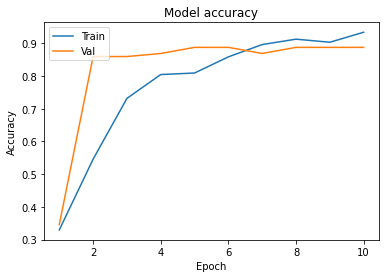

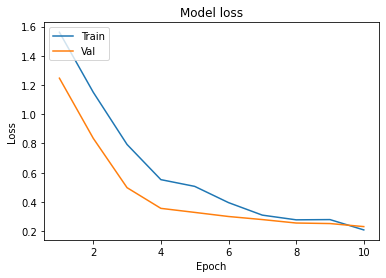

In [88]:
plot_learningCurve(history, 10)